***
# Observations or Inferences
***
#### 1.  By removing duplicates the total number of mice reduced by only one from 249 to 248 mice.
#### 2. The bar graph showed the Drug Regimen Capomulin has the maximum mice number with a total of 230, followed very closely by the Ramicane with 228 and Propriva has the smaller number with 148 mice. 
#### 3. The data a slight difference in quantity of mice by gender  since it showed a total of 123 female mice and 125 male mice.
#### 4.  From the selected treatments Capomulin and Ramicane are more effective reducing the size of tumors.
#### 5. With treatment Capomulin the correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
#### 6. The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change (independent variables) with the Capomulin treatment. The R-squared value is 0.71, which means 71% the model fit the data, wich is fairely good to predict the data from the model.  *(If you analyze a physical process and have very good measurements, you might expect R-squared values over 90%).*

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata
# study_results


In [2]:
# Getting the column names for mouse_metada
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
# Getting the column names for study_results
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice = merge_data['Mouse ID'].nunique()
# mice
pd.DataFrame({'Mouse ID': [mice]})

,Mouse ID
0,249


In [6]:
# Renaming the columns with extra characters
merge_data.rename(columns = {'Weight (g)':'Weight_g', 'Tumor Volume (mm3)':'Tumor_Volume_mm3'}, inplace = True)
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking unique values
mouse_metadata.nunique()
# merge_data.nunique()

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = merge_data.loc[merge_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate_mouse

# duplicate_mouse = merge_data[merge_data.duplicated()]
# duplicate_mouse


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. - all rows that match the one above
duplicate_mouse_all = merge_data[merge_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_all

# duplicate_mouse = merge_data[merge_data.duplicated('Mouse ID', 'Timepoint')] 
  
# print("Duplicate Rows based on Mouse ID :") 
# duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# See only mouse id g989 duplicate
midg989 = merge_data[merge_data['Mouse ID'] == 'g989']
midg989

# Visualize range where duplicate rows are
#merge_data.loc[905:920]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Average duplicate mouse ID and Timepoint to get single values to drop others next
# midg989 = midg989.groupby(['Mouse ID', "Timepoint"]).agg({"Tumor_Volume_mm3":['mean']})
# midg989

In [12]:
# Get column # for Tumor_Volume_mm3 
merge_data.columns
merge_data.columns.get_loc('Tumor_Volume_mm3')

6

In [13]:
# Duplicate index 909,911,913,915,917
# Replace index 908,910,912,916,918
# Replace mouse id duplicate g989 values with avg. above only for Timepoint 0,5,10,15,20
# merge_data_avg = merge_data

# merge_data_avg.iloc[908,6] = 45.000000
# # merge_data_avg.iloc[908,6]
# merge_data_avg.iloc[910,6] = 48.178597
# # merge_data_avg.iloc[910,6]
# merge_data_avg.iloc[912,6] = 50.812842
# # merge_data_avg.iloc[912,6]
# merge_data_avg.iloc[914,6] = 52.383936
# # merge_data_avg.iloc[914,6]
# merge_data_avg.iloc[916,6] = 54.991886
# # merge_data_avg.iloc[916,6]

# merge_data_avgb = merge_data_avg.drop([909,911,913,915,917])
# merge_data_avgb.loc[905:920]
# mice_avg = merge_data_avgb['Mouse ID'].nunique()
# mice

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. -- dropped the mouse complete
# isin in pandas = Equality test for DataFrame (True=dupl / False=unq)

merge_data_new = merge_data[merge_data['Mouse ID'].isin(duplicate_mouse)==False]
merge_data_new


,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# See new data for duplicate mouse midg989
midg989_drop = merge_data_new[merge_data_new['Mouse ID'] == 'g989']
midg989_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_mouse=merge_data_new["Mouse ID"].value_counts()
clean_number_mouse=len(clean_mouse)
clean_number_mouse

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = merge_data_new.groupby('Drug Regimen').mean()["Tumor_Volume_mm3"]
regimen_mean


regimen_median =  merge_data_new.groupby('Drug Regimen').median()["Tumor_Volume_mm3"]
regimen_median


regimen_variance = merge_data_new.groupby('Drug Regimen').var()["Tumor_Volume_mm3"]
regimen_variance


regimen_std =  merge_data_new.groupby('Drug Regimen').std()["Tumor_Volume_mm3"]
regimen_std

regimen_sem =  merge_data_new.groupby('Drug Regimen').sem()["Tumor_Volume_mm3"]
regimen_sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM  of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM  of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line ->This is the method I chose since it does all at once

#I chose this methode and keep it all at once
sts_data_df = merge_data_new

sts_data_df = sts_data_df.groupby(['Drug Regimen']).agg({'Tumor_Volume_mm3' : ['mean', 'median', "var", 'std', 'sem']})
sts_data_df

# Rename columns of agg. sts. 
sts_data_df.columns = ['TumorV_mean', 'TumorV_median', 'TumorV_variance', 'TumorV_stdev', 'TumorV_sem']
sts_data_df
# sts_data_df.columns


,TumorV_mean,TumorV_median,TumorV_variance,TumorV_stdev,TumorV_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:
count_mouse_regimen = merge_data_new.groupby(['Drug Regimen']).count()['Mouse ID']
count_mouse_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

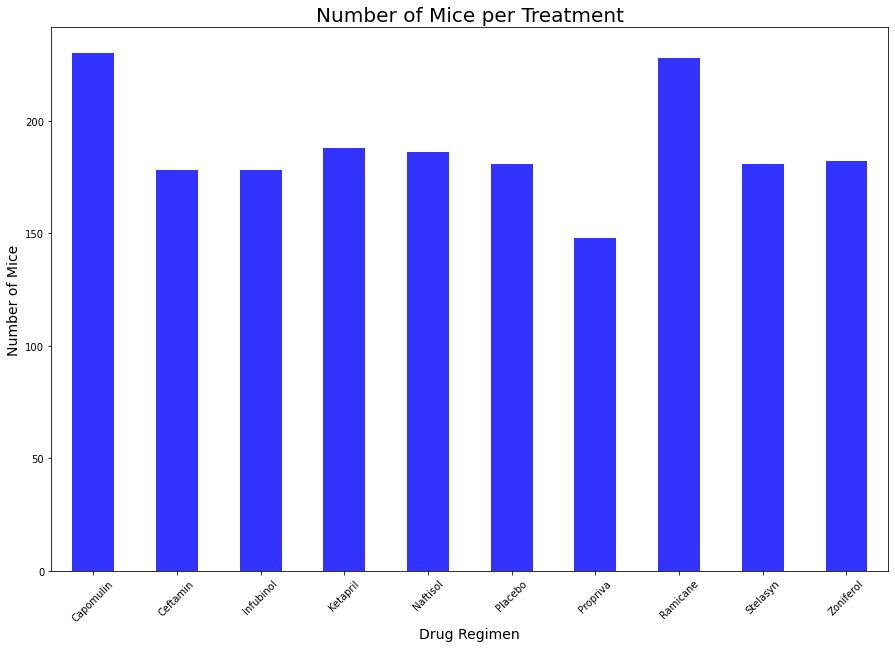

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

plot_pandas = count_mouse_regimen.plot.bar(color = 'blue', rot = 45, alpha=0.8, figsize = (15, 10))
count_mouse_regimen

# plot_pandas = count_mouse_regimen.DataFrema.plot(color = 'blue', rot = 45, figsize = (15, 10))
# count_mouse_regimen

plt.title('Number of Mice per Treatment', fontsize = 20)
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice',fontsize = 14)

count_mouse_regimen
plt.savefig("../Images/mice_per_treatment_df.png", bbox_inches = "tight")

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo
#https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-a-list/
#https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts

mouse_list =(merge_data_new.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mouse_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

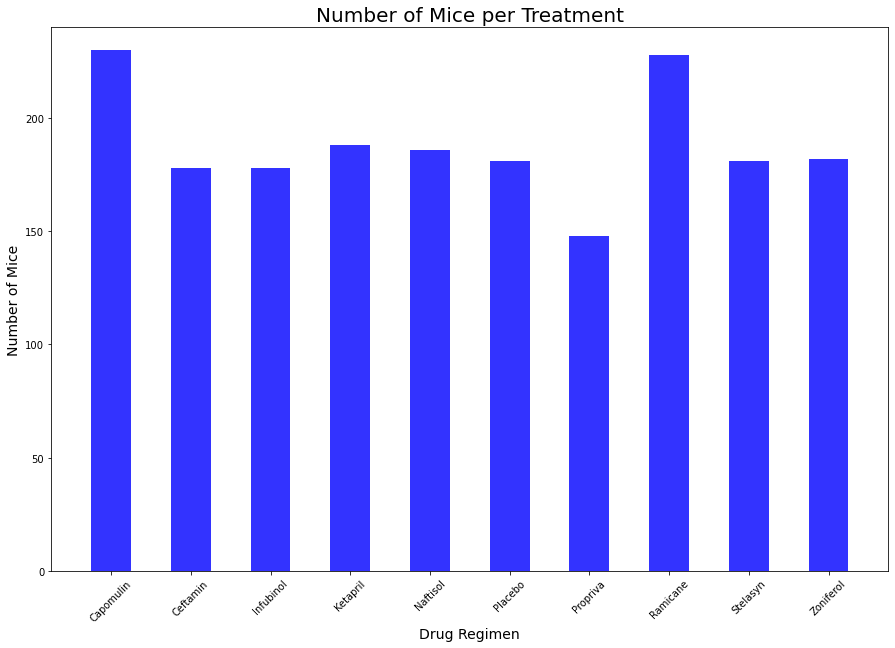

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.xticks(rotation=45) #https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xticks.html
#https://stackoverflow.com/questions/34100209/how-can-i-set-the-x-axis-tick-locations-for-a-bar-plot-created-from-a-pandas-dat

x_axis = np.arange(len(count_mouse_regimen))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mouse_list, color='blue', alpha=0.8, align='center', width = 0.5)

tick_locations = [value for value in x_axis]

#Manual tick_locations
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='45')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mouse_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

count_mouse_regimen
plt.savefig("../Images/mice_per_treatment_plt.png", bbox_inches = "tight")


[]

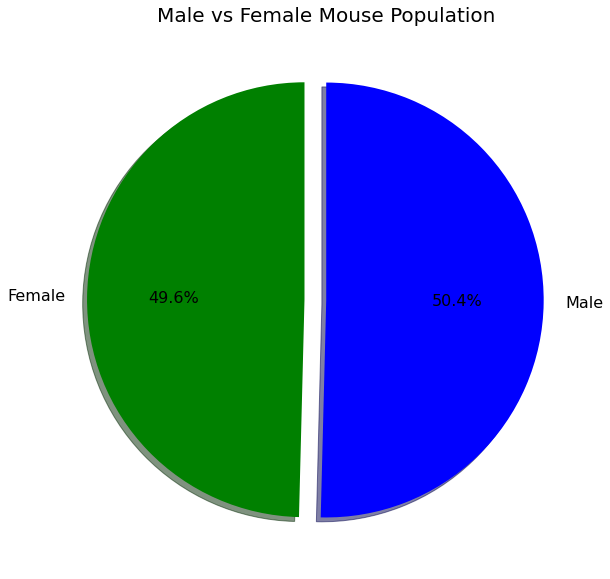

In [23]:

# Group by gender first
groupby_gender = merge_data_new.groupby(['Mouse ID', 'Sex'])
# groupby_gender

# Create new DataFrame for groupby_gender groupby (tested: nunique, count, size) - size (Return an int representing the number of elements in this object.)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html
gender_df = pd.DataFrame(groupby_gender.size())
# gender_df 

# Create a DataFrame from the groupby_gender to ge the total mice by gender
mouse_gender = pd.DataFrame(gender_df.groupby(['Sex']).count())
# mouse_gender
mouse_gender.columns = ['Total Count']
mouse_gender

# HW Question-> just Generate a pie plot showing the distribution of female versus male mice using Pandas's DataFrame.plot()
#https://markhneedham.com/blog/2018/09/18/matplotlib-remove-axis-legend/

colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(15,10), colors = colors, startangle=90, explode = explode, shadow = True, autopct="%1.1f%%", fontsize = 16, legend=None)

plt.title('Male vs Female Mouse Population',fontsize = 20)

plot.yaxis.set_label_text("")

plt.savefig('../Images/mouse_gender_df.png')
plot.plot()

In [24]:
mouse_gender.columns = ['Total Count']
mouse_gender

,Total Count
Sex,
Female,123
Male,125


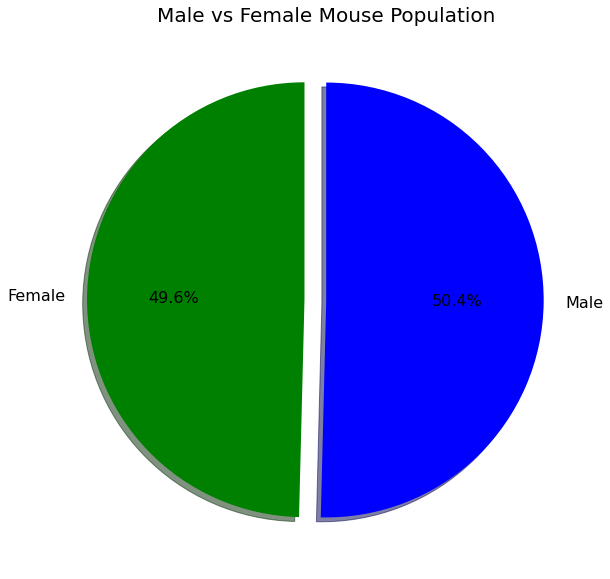

In [25]:
# HW Question-> just Generate a pie plot showing the distribution of female versus male mice using Matplotlib's pyplot
#https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

#Create Labels for the sections of the pie
labels = ["Female","Male"]
# labels

#List the values of each section of the pie chart
sizes = [49.6, 50.4]
# sizes

colors = ['green', 'blue']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", textprops={'fontsize': 16}, shadow=True, startangle=90)

plt.title('Male vs Female Mouse Population',fontsize = 20)


plt.savefig('../Images/mouse_gender_plt.png')

plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = merge_data_new.loc[merge_data_new["Drug Regimen"] == "Capomulin",:]
Capomulin_df

Ramicane_df = merge_data_new.loc[merge_data_new["Drug Regimen"] == "Ramicane", :]
Ramicane_df

Infubinol_df = merge_data_new.loc[merge_data_new["Drug Regimen"] == "Infubinol", :]
Infubinol_df

Ceftamin_df =  merge_data_new.loc[ merge_data_new["Drug Regimen"] == "Ceftamin", :]
Ceftamin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [27]:
# Start by getting the last (greatest) timepoint for each mouse-> used .max function
#03-03-Stu_Summary_Stats_Python/03-02-Ins_Quartiles_and_Outliers
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds
    
# 1-'Capomulin', 2-'Ceftamin', 3-'Infubinol', 4-'Ramicane'

# 1-Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
# Capomulin_last 
Capomulin_vol = pd.DataFrame(Capomulin_last)
# Capomulin_vol
Capomulin_merge = pd.merge(Capomulin_vol, merge_data_new, on=("Mouse ID","Timepoint"),how="left")
# Capomulin_merge.head()

# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor_Volume_mm3"]
# Capomulin_tumors

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
# quartiles
lowerq = quartiles[0.25]
# lowerq
upperq = quartiles[0.75]
# upperq
iqr = upperq-lowerq
# iqr

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound= lowerq - (1.5*iqr)
# lower_bound
upper_bound = upperq + (1.5*iqr)
# upper_bound

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [28]:
# Start by getting the last (greatest) timepoint for each mouse-> used .max function
#03-03-Stu_Summary_Stats_Python/03-02-Ins_Quartiles_and_Outliers
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds

# 2-Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
# Ceftamin_last
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
# Ceftamin_vol
Ceftamin_merge = pd.merge(Ceftamin_vol, merge_data_new, on=("Mouse ID","Timepoint"),how="left")
# Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor_Volume_mm3"]
# Ceftamin_tumors
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
# quartiles
lowerq = quartiles[0.25]
# lowerq
upperq = quartiles[0.75]
# upperq
iqr = upperq-lowerq
# iqr

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
# lower_bound
upper_bound = upperq + (1.5*iqr)
# upper_bound

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [29]:
# Start by getting the last (greatest) timepoint for each mouse-> used .max function
#03-03-Stu_Summary_Stats_Python/03-02-Ins_Quartiles_and_Outliers
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds
    
# 3-Infubinol 
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, merge_data_new, on=("Mouse ID","Timepoint"),how="left")
# Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor_Volume_mm3"]
# Infubinol_tumors

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
# quartiles
lowerq = quartiles[0.25]
# lowerq
upperq = quartiles[0.75]
# upperq
iqr = upperq-lowerq
# iqr

print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
# lower_bound
upper_bound = upperq + (1.5*iqr)
# upper_bound

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [30]:
# Start by getting the last (greatest) timepoint for each mouse-> used .max function
#03-03-Stu_Summary_Stats_Python/03-02-Ins_Quartiles_and_Outliers
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds

# 4-Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, merge_data_new, on=("Mouse ID","Timepoint"),how="left")
# Ramicane_merge.head()

Ramicane_tumors = Ramicane_merge["Tumor_Volume_mm3"]
# Ramicane_tumors

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
# quartiles
lowerq = quartiles[0.25]
# lowerq
upperq = quartiles[0.75]
# upperq
iqr = upperq-lowerq
# iqr

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
# lower_bound
upper_bound = upperq + (1.5*iqr)
# upper_bound

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [31]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels) -> couldn't make it work, made it manual sorry :(
# Create empty list to fill with tumor vol data (for plotting)

treatments_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
treatments_to_plot

Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
Regimen


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

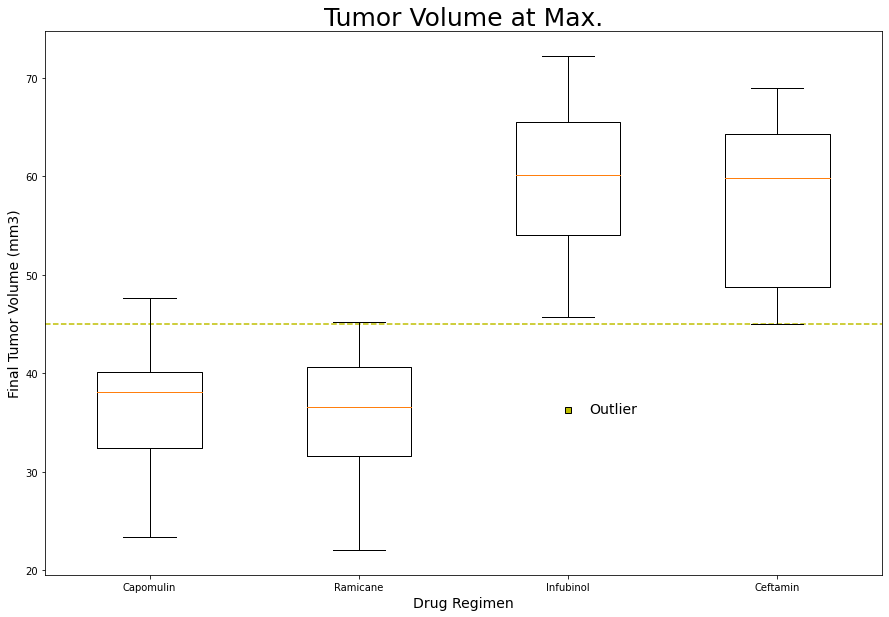

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color

# def box_plot(treatments_to_plot, edge_color, fill_color):
#     bp = ax.boxplot(treatments_to_plot, patch_artist=True)
    
#     for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
#         plt.setp(bp[element], color=edge_color)

#     for patch in bp['boxes']:
#         patch.set(facecolor=fill_color)       

# fig, ax = plt.subplots()
# box_plot(treatments_to_plot, 'blue', 'cyan')
#------

#https://matplotlib.org/3.3.3/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
# green_diamond = dict(markerfacecolor='g', marker='D')
# fig1, ax1 = plt.subplots()
# ax1.set_title('Tumor Volume at Selected Mouse')
# ax1.boxplot(treatments_to_plot, flierprops=green_diamond)

#---------
yellow_square = dict(markerfacecolor='y', marker='s')

    
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.boxplot(treatments_to_plot, labels=Regimen, widths = 0.5,vert=True,  flierprops=yellow_square) # patch_artist=True: function to fulfill the box  


plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

ax1.set_title('Tumor Volume at Max.',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14) 



# plt.show()

# Add horizontal line
reference  = [45]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='y', linestyle= '--')

plt.text(3.1, 36, 'Outlier', fontsize= 14)

plt.savefig('../Images/Tumor Volume at Max.png', bbox_inches = "tight")
plt.show()



## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Get all list of mice
merge_data_new['Mouse ID'].unique().tolist() 

# Choose 1 mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_last 


forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
forline_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


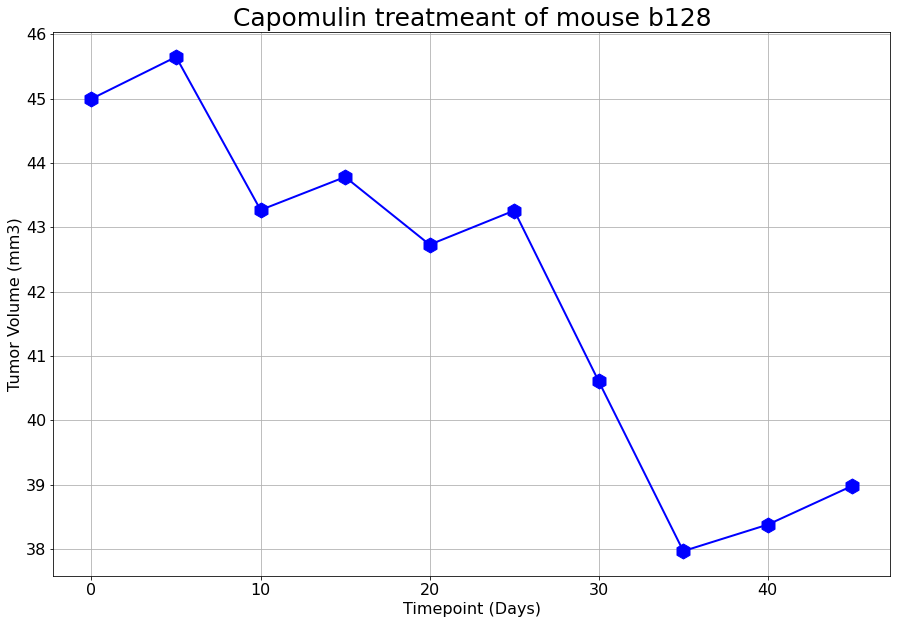

In [34]:
#https://matplotlib.org/3.1.0/api/markers_api.html
#https://matplotlib.org/3.3.3/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = forline_df["Timepoint"]
tumor_vol = forline_df["Tumor_Volume_mm3"]

fig1, ax1 = plt.subplots(figsize=(15, 10))

ax1.grid(True)

plt.title('Capomulin treatmeant of mouse b128',fontsize =25)
plt.plot(x_axis, tumor_vol, linewidth= 2, markersize= 15, marker= "h", color="blue")
plt.xlabel('Timepoint (Days)',fontsize= 16)
plt.ylabel('Tumor Volume (mm3)',fontsize= 16)

plt.savefig("../Images/capomulin_b128_line.png", bbox_inches = "tight")
plt.show()

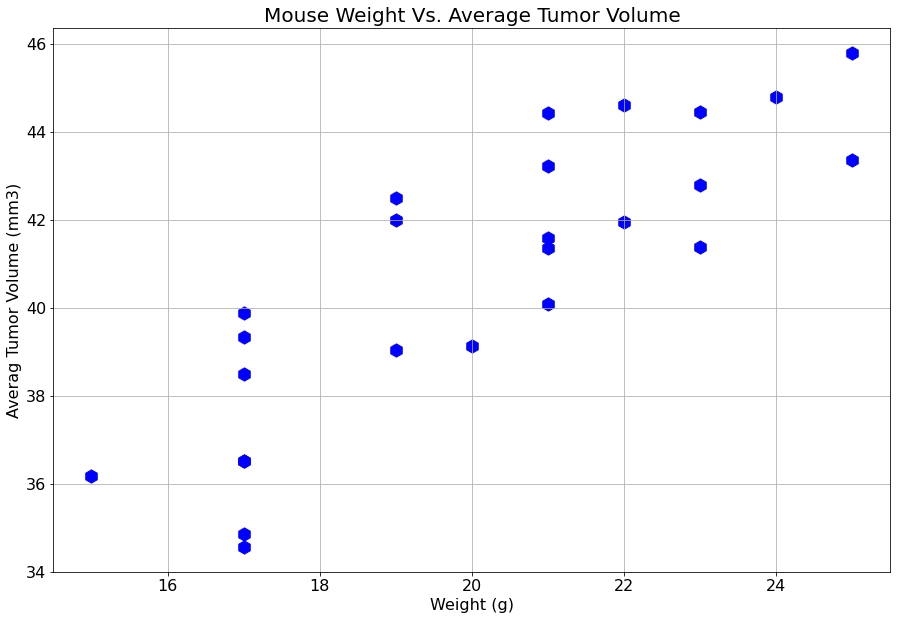

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capomulin_vol= Capomulin_df.groupby(['Mouse ID']).mean()

ax1.grid(True)

marker_size=15
plt.scatter(avg_capomulin_vol['Weight_g'],avg_capomulin_vol['Tumor_Volume_mm3'], marker= "h", s=175, color="blue")
plt.title('Mouse Weight Vs. Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =16)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =16)


# plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")

plt.savefig("../Images/mouse_wgt_avg_tun_vol.png", bbox_inches = "tight")

plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#03-06-Ins_Correlation_Conundrum / Pearson's Model

corr=round(st.pearsonr(avg_capomulin_vol['Weight_g'],avg_capomulin_vol['Tumor_Volume_mm3'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [37]:
#Method one 
#0-09-Stu_Fits_and_Regression

x_values = avg_capomulin_vol['Weight_g']
y_values = avg_capomulin_vol['Tumor_Volume_mm3']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134


The correlation between mouse weight and average tumor volume is 0.84
The r-squared is: 0.7088568047708717


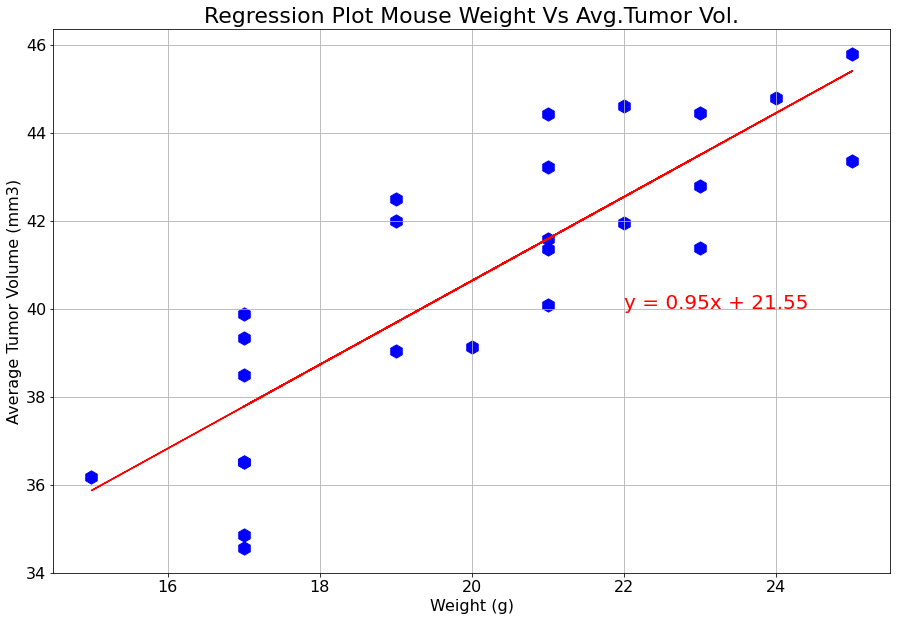

In [38]:
#Method one 
#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib-> method two
#03-09-Stu_Fits_and_Regression
fig1, ax1 = plt.subplots(figsize=(15, 10))
# plt.figure(figsize=(15, 10))

ax1 = avg_capomulin_vol['Weight_g']*slope+intercept

plt.scatter(avg_capomulin_vol['Weight_g'],avg_capomulin_vol['Tumor_Volume_mm3'], marker= "h", s=175, color="blue")

plt.plot(avg_capomulin_vol['Weight_g'],ax1,color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(22, 40),fontsize=20,color="red")

print(f"The correlation between mouse weight and average tumor volume is {corr}")
print(f"The r-squared is: {rvalue**2}")

plt.title('Regression Plot Mouse Weight Vs Avg.Tumor Vol.',fontsize =22)
plt.xlabel('Weight (g)', fontsize= 16)
plt.ylabel('Average Tumor Volume (mm3)', fontsize =16)

plt.grid()

plt.savefig("../Images/linear_regression_model_02", bbox_inches = "tight")
plt.show()

In [39]:
# #Method two -> exploring different ways
# #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

# model=st.linregress(avg_capomulin_vol['Weight_g'],avg_capomulin_vol['Tumor_Volume_mm3'])
# model

In [40]:
# #Method two
# # avg_capomulin_vol['Weight_g'] - Method two
# cslope=0.9544396890241045
# cintercept=21.552160532685015


In [41]:
# #Method two -> exploring different ways
# #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# #https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib-method one
# fig1, ax1 = plt.subplots(figsize=(15, 10))
# # plt.figure(figsize=(15, 10))

# ax1 = avg_capomulin_vol['Weight_g']*cslope+cintercept

# plt.scatter(avg_capomulin_vol['Weight_g'],avg_capomulin_vol['Tumor_Volume_mm3'], marker= "h", s=175, color="blue")

# plt.plot(avg_capomulin_vol['Weight_g'],ax1,color="red")

# line_eq = "y = " + str(round(cslope,2)) + "x + " + str(round(cintercept,2))
# plt.annotate(line_eq,(22, 40),fontsize=20,color="red")

# print(f"The correlation between mouse weight and average tumor volume is {corr}")
# print(f"The r-squared is: {rvalue**2}")

# plt.title('Regression Plot Mouse Weight Vs Avg.Tumor Vol.',fontsize =22)
# plt.xlabel('Weight (g)', fontsize= 16)
# plt.ylabel('Average Tumor Volume (mm3)', fontsize =16)

# plt.grid()

# plt.savefig("../Images/linear_regression_model_01", bbox_inches = "tight")
# plt.show()
